In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy as sp
from scipy.io import loadmat
import os


base_dir = Path(os.getcwd()).parent 
data_dir = base_dir / 'data'

In [2]:
data = loadmat(data_dir / 'timeseries_allsubs.mat')
# subs, timepoints, regions
data['timeseries'].shape

(96, 4340, 100)

In [4]:
labels = loadmat(data_dir / 'labels.mat')
labels = [e[0] for e in labels['labels'].squeeze()]
np.unique(labels)

array(['EMOTION', 'GAMBLING', 'LANGUAGE', 'MEMORY', 'MOTOR', 'RELATIONAL',
       'REST', 'SOCIAL'], dtype='<U10')

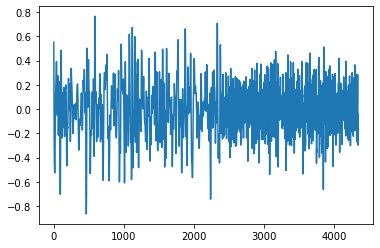

In [8]:
sub = data['timeseries'][0,:,:]
plt.plot(sub.mean(axis=1))

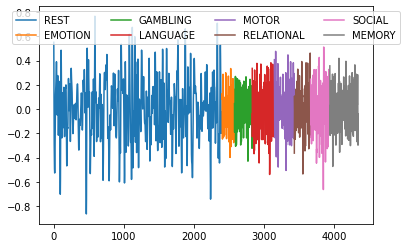

In [9]:
ax = sns.lineplot(x=np.arange(len(sub.mean(axis=1))), y=sub.mean(axis=1), hue=labels )
ax.legend(loc='upper center', ncol=4)

In [6]:
seconds = sub.shape[0] * 2
seconds / 60

144.66666666666666

In [7]:
from dyneusr import DyNeuGraph
from kmapper import KeplerMapper, Cover
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# Fetch dataset, extract time-series from ventral temporal (VT) mask
# Encode labels as integers
df = pd.DataFrame(labels, columns=['labels'])
target, labels = pd.factorize(df.labels.values)
y = pd.DataFrame({l:(target==i).astype(int) for i,l in enumerate(labels)})

# Generate shape graph using KeplerMapper
mapper = KeplerMapper(verbose=1)
lens = mapper.fit_transform(sub, projection=TSNE(2))
graph = mapper.map(lens, sub, cover=Cover(20, 0.5), clusterer=DBSCAN(eps=20.))

# Visualize the shape graph using DyNeuSR's DyNeuGraph                          
dG = DyNeuGraph(G=graph, y=y)
dG.visualize('dyneusr_output.html')

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: TSNE()
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (4340, 100)

..Projecting data using: 
	TSNE(verbose=1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4340 samples in 0.007s...
[t-SNE] Computed neighbors for 4340 samples in 1.190s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4340
[t-SNE] Computed conditional probabilities for sample 2000 / 4340
[t-SNE] Computed conditional probabilities for sample 3000 / 4340
[t-SNE] Computed conditional probabilities for sample 4000 / 4340
[t-SNE] Computed conditional probabilities for sample 4340 / 4340
[t-SNE] Mean sigma: 1.269540
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.611221
[t-SNE] KL divergence after 1000 iterations: 1.893594

..Scaling with: MinMaxScaler()

Mapping on data shaped (4340, 100) using lens shaped (4340, 2)

Creating 400 hypercubes.

Created 1148 edges and 318 n

label,group,value,row_count
REST,0,2400,4340
EMOTION,1,176,4340
GAMBLING,2,253,4340
LANGUAGE,3,316,4340
MOTOR,4,284,4340
RELATIONAL,5,232,4340
SOCIAL,6,274,4340
MEMORY,7,405,4340


Already serving localhost:None 
[Force Graph] file:///home/poetz/Desktop/PhD/Projects/Projects%20CSSS/TDA/CSSS22-TDA/code/dyneusr_output.html


DyNeuGraph()

In [8]:
lens.shape

(4340, 2)

In [9]:
graph.keys()

dict_keys(['nodes', 'links', 'simplices', 'meta_data', 'meta_nodes'])

In [10]:
graph.keys()

dict_keys(['nodes', 'links', 'simplices', 'meta_data', 'meta_nodes'])

In [11]:
graph['meta_nodes']

defaultdict(list, {})

In [12]:
y

,REST,EMOTION,GAMBLING,LANGUAGE,MOTOR,RELATIONAL,SOCIAL,MEMORY
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4335,0,0,0,0,0,0,0,1
4336,0,0,0,0,0,0,0,1
4337,0,0,0,0,0,0,0,1
4338,0,0,0,0,0,0,0,1


In [13]:
graph

{'nodes': defaultdict(list,
             {'cube0_cluster0': [1931,
               1932,
               1933,
               1934,
               1935,
               1936,
               1937,
               1938],
              'cube1_cluster0': [1931,
               1932,
               1933,
               1934,
               1935,
               1936,
               1937,
               1938,
               1939,
               1940,
               1941,
               1942,
               1943,
               1944,
               1945,
               1946,
               1947,
               1948,
               1949,
               1950,
               1951,
               1952,
               1953,
               1954,
               1955,
               1956],
              'cube2_cluster0': [1939,
               1940,
               1941,
               1942,
               1943,
               1944,
               1945,
               1946,
               1947,
             

In [26]:
graph.keys()

dict_keys(['nodes', 'links', 'simplices', 'meta_data', 'meta_nodes'])

In [31]:
graph2={}

graph2['nodes'] = graph['nodes']
graph2['links'] = graph['links']

graph2.keys()

dict_keys(['nodes', 'links'])

In [32]:
# Visualize the shape graph using DyNeuSR's DyNeuGraph                          
dG = DyNeuGraph(G=graph2, y=y)
dG.visualize('dyneusr_output.html')

label,group,value,row_count
REST,0,2400,4340
EMOTION,1,176,4340
GAMBLING,2,253,4340
LANGUAGE,3,316,4340
MOTOR,4,284,4340
RELATIONAL,5,232,4340
SOCIAL,6,274,4340
MEMORY,7,405,4340


Already serving localhost:None 
[Force Graph] file:///home/poetz/Desktop/PhD/Projects/Projects%20CSSS/TDA/CSSS22-TDA/code/dyneusr_output.html


DyNeuGraph()

In [40]:
graph['nodes']['cube0_cluster0']

[1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956]